In [87]:
import sqlite3

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [88]:
with sqlite3.connect("../db.sqlite3") as conn:
    query = """
    SELECT *
    FROM restaurant_order
    JOIN restaurant_orderitem ON restaurant_orderitem.order_id = restaurant_order.id
    Join restaurant_product ON restaurant_product.id = restaurant_orderitem.product_id
    """
    df = pd.read_sql(query, conn)

df.to_csv("data.csv")

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

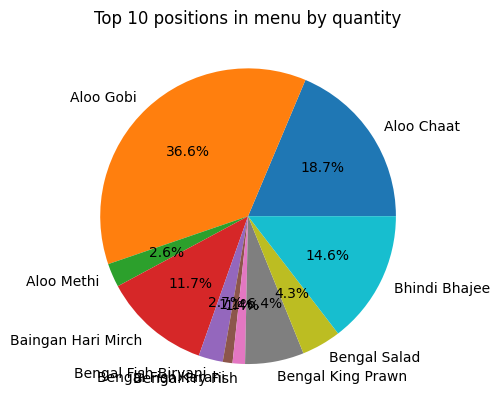

In [89]:
top_ten = df.sort_values(by="quantity", ascending=False).groupby("name").sum().head(10)

plt.pie(top_ten["quantity"], labels=top_ten.index, autopct="%1.1f%%")
plt.title("Top 10 positions in menu by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

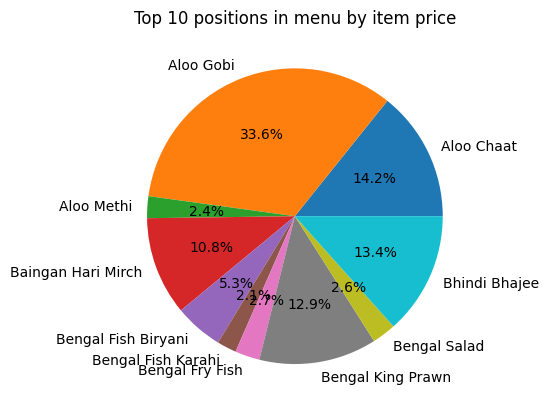

In [90]:
df["item_price"] = df["quantity"] * df["price"]
top_ten = df.sort_values(by="item_price", ascending=False).groupby("name").sum().head(10)

plt.pie(top_ten["item_price"], labels=top_ten.index, autopct="%1.1f%%")
plt.title("Top 10 positions in menu by item price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

Text(0.5, 0, 'Order Hour')

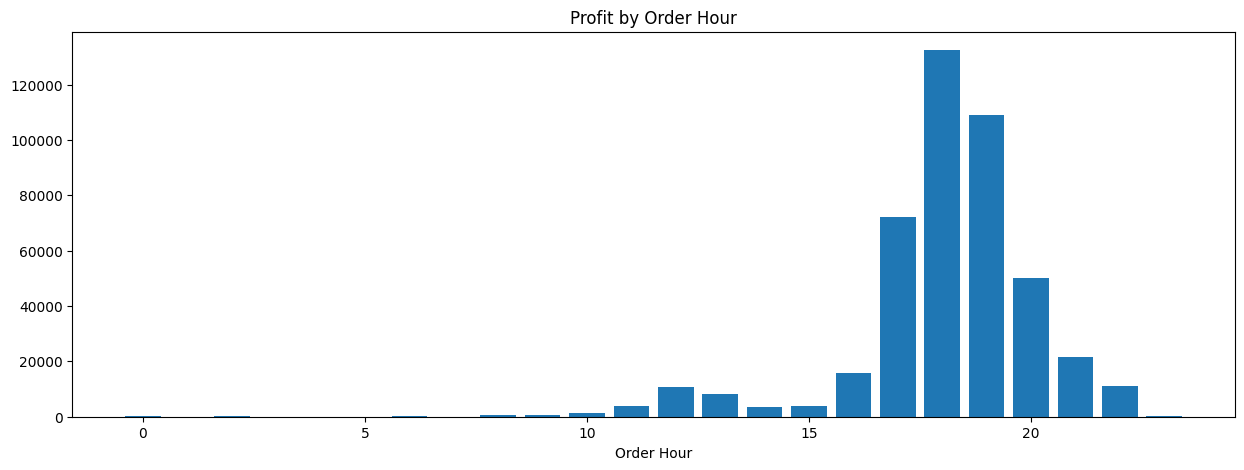

In [91]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
income = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(15, 5))
plt.bar(income.index, income.values)
plt.title("Profit by Order Hour")
plt.xlabel("Order Hour")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

Text(0.5, 0, 'Day Of The Week')

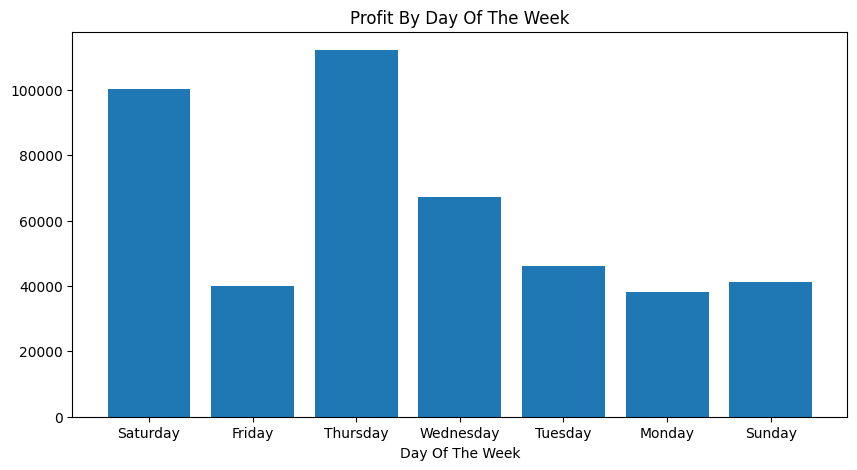

In [92]:
df["order_day"] = df["datetime"].dt.day_name()
weekdays = df["order_day"].unique()
income = df.groupby("order_day")["item_price"].sum()
income.index = weekdays

plt.figure(figsize=(10, 5))
plt.bar(income.index, income.values)
plt.title("Profit By Day Of The Week")
plt.xlabel("Day Of The Week")